In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

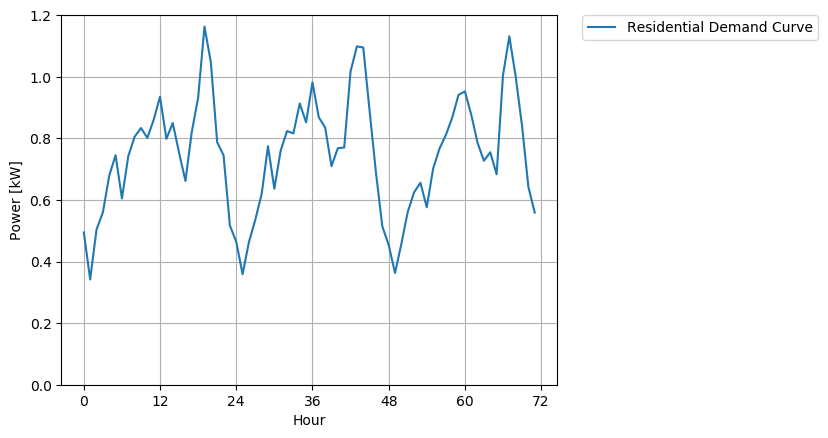

In [43]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

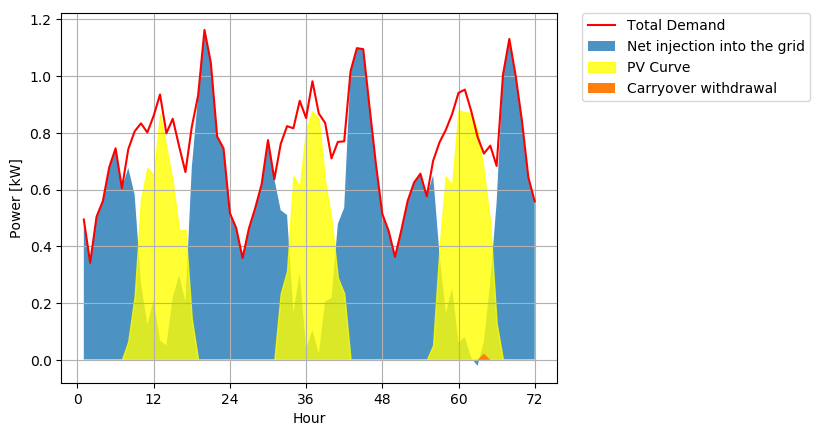

In [44]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [45]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 548.26 186.12  | 0.02 0.02 362.14  | 186.12 0.02 91.2 91.18 0.0 
2 544.77 131.08  | 0.0 0.0 413.69  | 317.2 0.02 155.43 155.41 0.0 
3 551.35 161.39  | 0.29 0.29 389.95  | 478.6 0.31 234.51 234.2 0.0 
4 540.51 174.56  | 0.0 0.0 365.95  | 653.16 0.31 320.05 319.74 0.0 
5 556.1 176.06  | 0.0 0.0 380.04  | 829.22 0.31 406.32 406.0 0.0 
6 554.97 157.04  | 0.0 0.0 397.93  | 986.26 0.31 483.27 482.95 0.0 
7 539.62 168.17  | 0.16 0.16 371.45  | 1154.42 0.47 565.67 565.2 0.0 
8 545.99 178.33  | 0.5 0.5 367.67  | 1332.75 0.97 653.05 652.07 0.0 
9 537.48 174.08  | 0.08 0.08 363.41  | 1506.83 1.05 738.34 737.29 0.0 
10 556.38 169.63  | 0.0 0.0 386.76  | 1676.45 1.05 821.46 820.41 0.0 
11 558.61 170.62  | 0.04 0.04 387.99  | 1847.07 1.1 905.07 903.97 0.0 
12 562.36 157.47  | 0.0 0.0 404.89  | 2004.54 1.1 982.23 981.13 0.0 


In [46]:
ebalance[1]

Dict{String,Float64} with 12 entries:
  "PV_energy"         => 186.123
  "max_surplus"       => 91.1814
  "consumer_energy"   => 548.261
  "withdrawn_energy"  => 0.019065
  "peak_demand"       => 1.17928
  "injection_grid"    => 0.019065
  "grid_energy"       => 362.138
  "global_generation" => 186.123
  "peak_power"        => 1.17928
  "global_allowance"  => 91.2005
  "carry_over"        => 0.0
  "global_withdrawal" => 0.019065

### Billings case residential 1

In [5]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_cost | counterfactual_cost savings
47850.33 12.58 56192.18  | 78358.62 22166.44
52693.39 0.0 61904.45  | 77937.08 16032.62
52736.66 0.0 61955.62  | 78830.15 16874.53
48266.68 0.0 56669.64  | 77268.47 20598.83
50351.09 0.0 59134.56  | 79214.04 20079.48
50037.98 0.0 58764.29  | 79352.43 20588.13
47985.79 14.22 56354.32  | 77220.59 20866.27
48549.12 6.03 57010.78  | 78027.59 21016.82
49343.95 0.0 57943.57  | 77154.9 19211.33
49658.5 21.85 58341.41  | 79494.75 21153.34
50239.85 1.48 59004.76  | 79607.82 20603.06
51322.33 0.0 60283.1  | 79576.23 19293.13


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [6]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

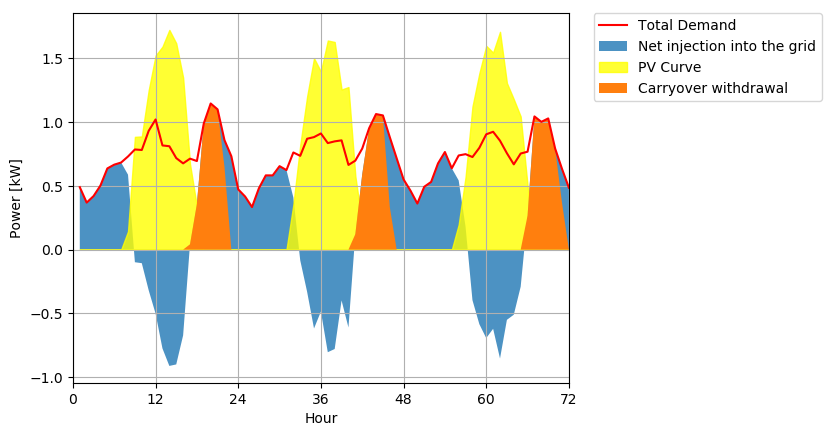

In [7]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [8]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 544.04 378.02  | 138.7 138.7 166.02  | 378.02 138.7 185.23 46.53 0.0 
2 545.46 251.91  | 42.35 42.35 293.55  | 629.94 181.05 308.67 127.62 0.0 
3 552.02 292.55  | 66.32 66.32 259.47  | 922.49 247.37 452.02 204.64 0.0 
4 539.9 353.01  | 114.95 114.95 186.88  | 1275.5 362.33 624.99 262.67 0.0 
5 555.99 362.52  | 111.28 111.28 193.47  | 1638.02 473.61 802.63 329.02 0.0 
6 556.68 306.43  | 71.0 71.0 250.25  | 1944.45 544.61 952.78 408.17 0.0 
7 537.31 358.5  | 113.92 113.92 178.81  | 2302.95 658.54 1128.44 469.91 0.0 
8 547.65 382.91  | 127.98 127.98 164.73  | 2685.86 786.51 1316.07 529.56 0.0 
9 536.5 332.78  | 103.98 103.98 203.71  | 3018.64 890.49 1479.13 588.64 0.0 
10 558.43 357.72  | 125.17 125.17 200.71  | 3376.36 1015.66 1654.42 638.76 0.0 
11 557.51 332.96  | 84.41 84.41 224.55  | 3709.32 1100.07 1817.57 717.5 0.0 
12 559.1

### Billings case residential 2

In [9]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_cost | counterfactual_cost savings
10480.82 2916.81 16064.16  | 77788.22 61724.06
21687.73 890.65 26971.91  | 77956.39 50984.49
18386.83 1394.8 23661.64  | 78733.25 55071.62
11798.03 2417.45 17057.44  | 77297.68 60240.24
12213.89 2340.3 17466.39  | 79203.09 61736.71
17493.3 1493.21 22720.49  | 79284.99 56564.51
11288.34 2395.83 16418.62  | 76990.96 60572.34
10399.68 2691.36 15699.5  | 78215.25 62515.75
12985.87 2186.65 18206.21  | 76895.22 58689.01
12694.45 2632.25 18389.01  | 79491.99 61102.98
15004.35 1775.16 20108.17  | 79383.46 59275.28
12968.7 2236.62 18245.07  | 79576.35 61331.28


## Residential Case 3: Large PV System that generates multi-day carry over

In [10]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

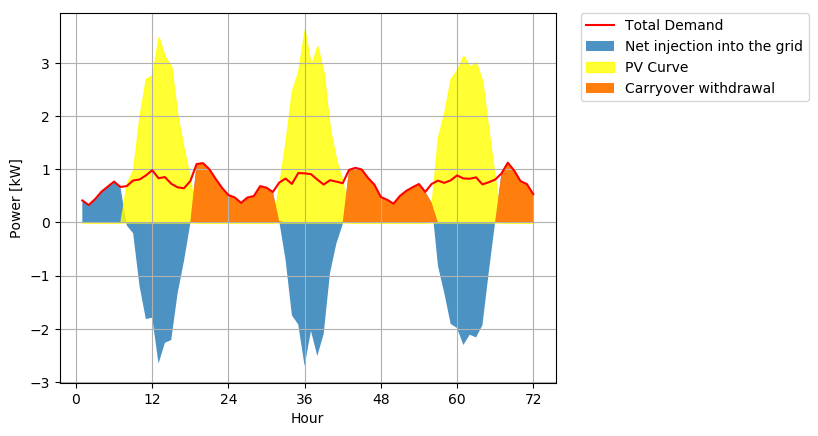

In [11]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [12]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 543.36 755.01  | 490.16 278.51 0.0  | 755.01 278.51 369.95 91.45 91.45 
2 544.56 513.75  | 284.16 314.97 0.0  | 1268.76 593.47 621.69 28.22 28.22 
3 553.07 626.21  | 378.75 305.61 0.0  | 1894.97 899.08 928.53 29.45 29.45 
4 541.03 677.06  | 412.4 276.36 0.0  | 2572.03 1175.44 1260.3 84.85 84.85 
5 554.3 661.1  | 413.53 306.73 0.0  | 3233.13 1482.17 1584.24 102.06 102.06 
6 558.23 603.11  | 354.7 309.83 0.0  | 3836.24 1792.0 1879.76 87.76 87.76 
7 538.53 642.35  | 384.9 281.07 0.0  | 4478.59 2073.07 2194.51 121.43 121.43 
8 546.93 693.22  | 436.61 290.32 0.0  | 5171.81 2363.4 2534.19 170.79 170.79 
9 537.32 725.93  | 462.61 273.99 0.0  | 5897.74 2637.39 2889.89 252.5 252.5 
10 556.05 712.12  | 440.27 284.19 0.0  | 6609.86 2921.58 3238.83 317.25 317.25 
11 557.91 728.39  | 464.2 293.73 0.0  | 7338.25 3215.31 3595.74 380.43 380.43 

### Billings case residential 3

In [13]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 5856.99 6937.04  | 77707.61 70770.57
0.0 6623.73 7845.17  | 77849.45 70004.27
0.0 6427.03 7612.21  | 78857.85 71245.64
0.0 5811.81 6883.54  | 77431.41 70547.87
0.0 6450.5 7640.0  | 79003.4 71363.4
0.0 6515.72 7717.25  | 79468.76 71751.51
0.0 5910.98 7001.0  | 77135.27 70134.27
0.0 6105.44 7231.31  | 78130.42 70899.12
0.0 5762.1 6824.66  | 76992.51 70167.85
0.0 5976.61 7078.72  | 79209.96 72131.24
0.0 6177.06 7316.14  | 79430.55 72114.4
0.0 6340.54 7509.77  | 79542.69 72032.92


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

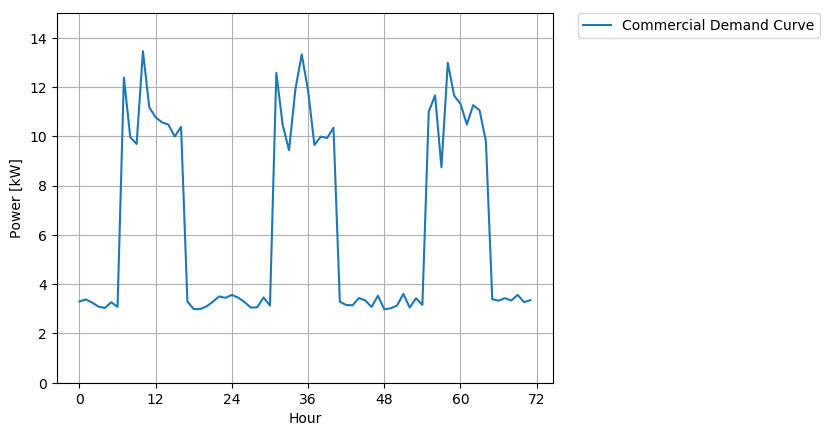

In [14]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

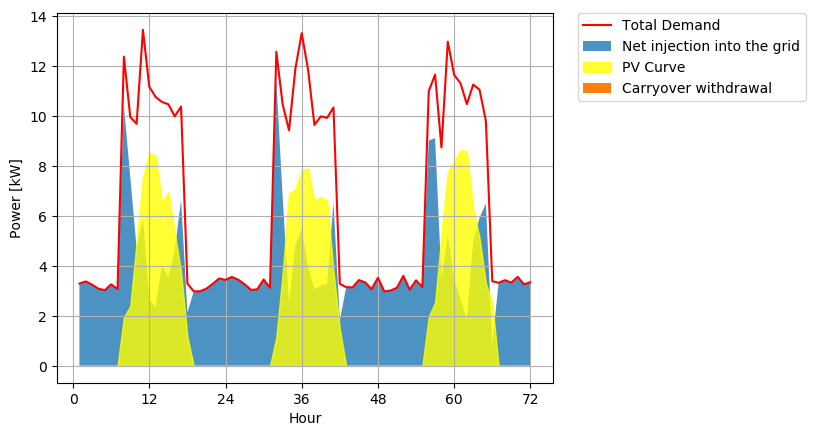

In [15]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [16]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4988.41 1797.44  | 0.08 0.08 3190.97  | 14.9 10.13  | 1797.44 0.08 880.74 880.66 0.0 
2 5119.22 1265.67  | 0.0 0.0 3853.55  | 16.78 12.52  | 3063.1 0.08 1500.92 1500.84 0.0 
3 4837.81 1459.79  | 0.0 0.0 3378.02  | 14.48 10.83  | 4522.9 0.08 2216.22 2216.14 0.0 
4 5032.87 1674.46  | 0.0 0.0 3358.41  | 15.42 10.9  | 6197.36 0.08 3036.71 3036.63 0.0 
5 5344.54 1732.21  | 0.0 0.0 3612.33  | 15.99 11.04  | 7929.57 0.08 3885.49 3885.41 0.0 
6 5197.75 1770.28  | 0.0 0.0 3427.47  | 16.03 11.16  | 9699.85 0.08 4752.92 4752.85 0.0 
7 4948.36 1621.99  | 0.0 0.0 3326.37  | 14.84 9.97  | 11321.84 0.08 5547.7 5547.62 0.0 
8 5006.81 1684.97  | 0.0 0.0 3321.84  | 14.95 10.99  | 13006.81 0.08 6373.34 6373.26 0.0 
9 4892.02 1577.28  | 0.0 0.0 3314.74  | 15.05 10.45  | 14584.09 0.08 7146.2 7146.12 0.0 
10 4756.59 1701.1 

In [17]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
204924.23 1.68 101806.07 363175.32  | 320355.65 149830.46 557047.87  | 193872.55
247475.03 0.0 125833.29 441897.27  | 328756.08 168732.7 588836.83  | 146939.56
216936.54 0.0 108909.18 385764.81  | 310684.45 145607.08 540575.26  | 154810.45
215677.05 0.0 109561.4 384999.14  | 323210.99 155008.66 566422.44  | 181423.29
231983.8 0.0 110973.89 406223.22  | 343226.41 160753.68 597076.5  | 190853.28
220112.18 0.0 112238.45 393402.76  | 333799.39 161193.53 586248.48  | 192845.72
213619.24 0.0 100258.51 371850.27  | 317783.38 149232.86 553269.86  | 181419.6
213328.68 0.0 110514.67 383269.9  | 321537.63 150328.43 559040.23  | 175770.33
212872.62 0.0 105043.0 376442.9  | 314165.37 151317.1 551312.11  | 174869.21
196223.87 0.0 103328.99 354461.69  | 305468.48 141980.25 530143.06  | 175681.37
212799.37 0.0 107048.3 378655.94  | 319073.49 1534

## Commercial case 2: medium PV system

In [18]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

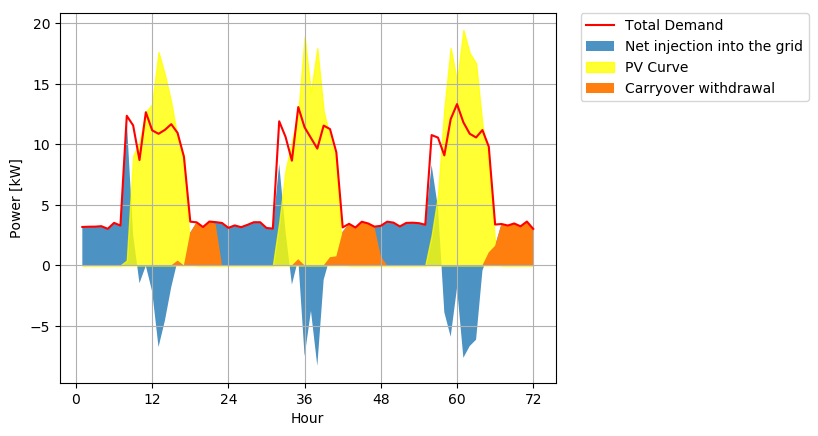

In [19]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [20]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4966.97 4229.4  | 935.75 935.75 737.58  | 14.82 7.91  | 4229.4 935.75 2072.4 1136.66 0.0 
2 5088.25 2858.1  | 195.48 195.48 2230.16  | 16.85 12.6  | 7087.49 1131.23 3472.87 2341.64 0.0 
3 4853.64 3019.36  | 418.98 418.98 1834.28  | 14.42 10.82  | 10106.86 1550.21 4952.36 3402.15 0.0 
4 5007.83 3458.18  | 397.73 397.73 1549.65  | 15.28 7.34  | 13565.04 1947.94 6646.87 4698.93 0.0 
5 5365.01 3375.59  | 186.16 186.16 1989.42  | 15.84 7.35  | 16940.63 2134.09 8300.91 6166.82 0.0 
6 5181.7 3587.0  | 361.49 361.49 1594.7  | 15.95 7.22  | 20527.63 2495.59 10058.54 7562.95 0.0 
7 4968.61 3625.35  | 546.46 546.46 1343.26  | 14.72 9.51  | 24152.98 3042.05 11834.96 8792.91 0.0 
8 5008.67 3587.67  | 617.08 617.08 1421.0  | 14.94 9.81  | 27740.65 3659.13 13592.92 9933.79 0.0 
9 4917.88 3535.46  | 492.89 492.89 1382

In [21]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
78684.82 19678.8 0.0 116187.38  | 318979.05 149015.12 554457.39  | 438270.01
237913.19 4110.99 0.0 285702.31  | 326767.61 169367.47 587174.77  | 301472.45
195680.97 8811.11 0.0 241418.15  | 311701.0 144953.39 541047.2  | 299629.05
165316.34 8364.21 0.0 205046.36  | 321602.97 153566.84 562834.84  | 357788.48
212231.4 3914.88 0.0 255155.19  | 344541.24 159196.79 596870.58  | 341715.39
170123.04 7602.24 0.0 209817.72  | 332768.86 160312.7 583998.86  | 374181.13
143299.2 11492.05 0.0 182761.92  | 319084.35 148015.09 553436.44  | 370674.52
151592.25 12977.25 0.0 194310.13  | 321656.6 150219.74 559058.52  | 364748.4
147476.52 10365.37 0.0 186358.4  | 315825.99 152032.41 554129.26  | 367770.86
112812.54 13968.24 0.0 149708.21  | 304881.59 141789.33 529218.45  | 379510.24
157567.65 8685.0 0.0 196279.74  | 318753.71 153600.99 559448.78  | 363169.04
126660

In [22]:
bills_commercial[1]
17541.458857820482

61064.81201329797

8220.263155636265

8220.263155636265

## Commercial case 3: Large PV system

In [23]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

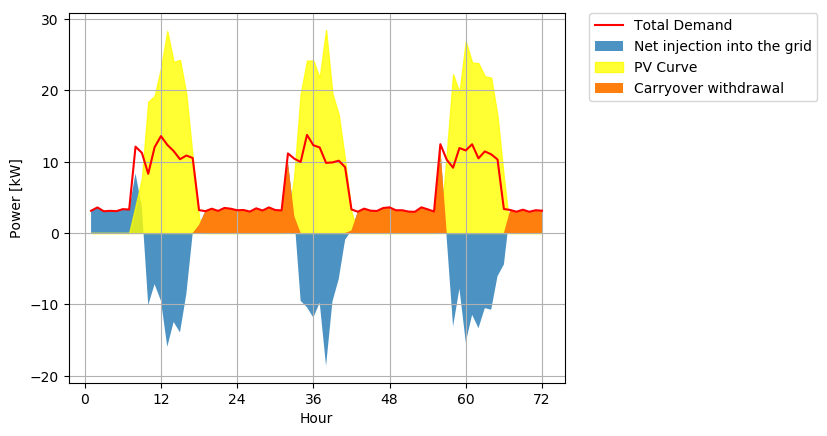

In [24]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [25]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4987.82 6154.75  | 2673.86 1506.93 0.0  | 14.89 5.61  | 6154.75 1506.93 3015.83 1508.89 1166.93 
2 5106.08 4682.42  | 1515.66 1939.32 0.0  | 16.82 12.6  | 10837.16 3446.26 5310.21 1863.95 743.27 
3 4851.43 4734.36  | 1825.2 1942.28 0.0  | 14.38 10.86  | 15571.52 5388.53 7630.05 2241.51 626.19 
4 5040.32 5350.87  | 1987.32 1676.77 0.0  | 15.47 10.12  | 20922.4 7065.3 10251.97 3186.67 936.74 
5 5363.39 5337.63  | 1818.74 1844.5 0.0  | 15.82 5.71  | 26260.03 8909.8 12867.41 3957.61 910.98 
6 5197.61 5322.42  | 1793.68 1668.86 0.0  | 16.01 5.45  | 31582.45 10578.66 15475.4 4896.74 1035.8 
7 4966.2 5324.38  | 2012.37 1654.19 0.0  | 14.65 9.26  | 36906.83 12232.86 18084.35 5851.49 1393.97 
8 5016.96 5744.85  | 2440.37 1712.48 0.0  | 14.92 9.01  | 42651.68 13945.34 20899.32 6953.98 2121.86 
9 4892.43 5240.39 

In [26]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 31690.81 0.0 37534.73  | 320317.52 149670.16 556818.09  | 519283.36
0.0 40784.0 0.0 48304.75  | 327912.59 169142.71 588293.31  | 539988.56
0.0 40846.07 0.0 48378.26  | 311559.04 144591.39 540461.16  | 492082.89
0.0 35262.38 0.0 41764.91  | 323689.63 155538.28 567605.57  | 525840.65
0.0 38789.92 0.0 45942.95  | 344437.14 159031.44 596555.7  | 550612.75
0.0 35096.12 0.0 41568.0  | 333790.25 160926.41 585930.97  | 544362.97
0.0 34787.71 0.0 41202.71  | 318929.39 147280.64 552407.38  | 511204.67
0.0 36013.5 0.0 42654.55  | 322189.21 149967.64 559409.52  | 516754.96
0.0 35120.73 0.0 41597.15  | 314191.67 150664.2 550594.53  | 508997.38
0.0 33530.1 0.0 39713.2  | 303703.36 141187.35 527111.26  | 487398.06
0.0 33490.49 0.0 39666.28  | 318340.03 152879.34 558123.37  | 518457.09
0.0 33242.82 0.0 39372.94  | 310115.63 144470.19 538586.8

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

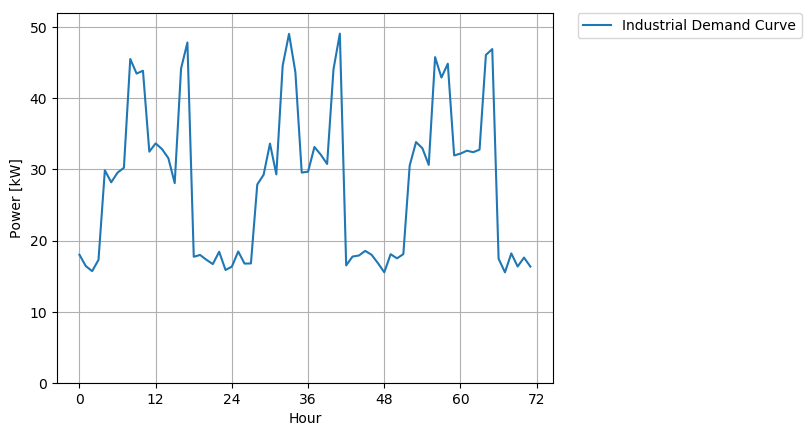

In [27]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

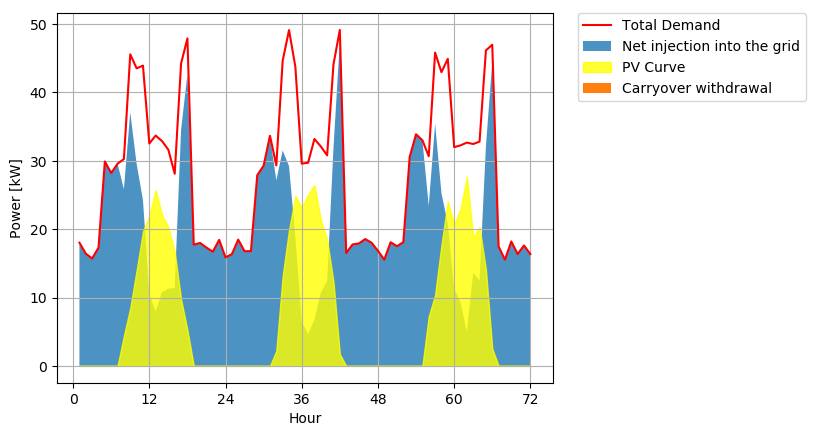

In [28]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [29]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7183.15 8134.21 5747.99  | 5682.43 0.0 0.0  | 4833.71 4801.21 5747.99  | 50.8 50.66 33.79  | 49.92 37.09 33.79  | 5682.43 0.0 2784.39 2784.39 0.0 
2 | 6668.44 7491.91 5235.08  | 3918.41 0.0 0.0  | 4998.13 5243.82 5235.08  | 51.65 51.23 34.45  | 51.57 38.5 34.45  | 9600.84 0.0 4704.41 4704.41 0.0 
3 | 7188.35 8101.11 5725.15  | 4640.28 0.0 0.0  | 5131.72 5517.46 5725.15  | 50.82 50.76 32.93  | 50.71 33.76 32.93  | 14241.12 0.0 6978.15 6978.15 0.0 
4 | 7487.8 8471.84 5936.2  | 5108.68 0.0 0.0  | 5291.36 5559.59 5936.2  | 54.31 54.13 36.1  | 54.27 35.9 36.1  | 19349.8 0.0 9481.4 9481.4 0.0 
5 | 7255.79 8085.93 5713.03  | 4783

In [30]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
263050.52 130640.96 112603.13  | 0.0  | 390907.0 221331.73 112603.13  | 476423.05 251850.22 145647.62  | 484732.54 343947.89 145647.62  | 385945.52 
271997.98 142684.33 102555.28  | 0.0  | 362896.48 203854.96 102555.28  | 492079.04 261426.87 148481.29  | 492847.82 347824.56 148481.29  | 288276.46 
279268.44 150130.07 112155.71  | 0.0  | 391189.99 220431.3 112155.71  | 483931.48 229238.54 141924.31  | 484923.21 344654.61 141924.31  | 358965.97 
287955.96 151276.47 116290.23  | 0.0  | 407485.82 230518.66 116290.23  | 517929.4 243762.03 155596.1  | 518245.49 367511.63 155596.1  | 388387.77 
295475.32 139557.5

## TMT Case2: Medium PV System

In [31]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

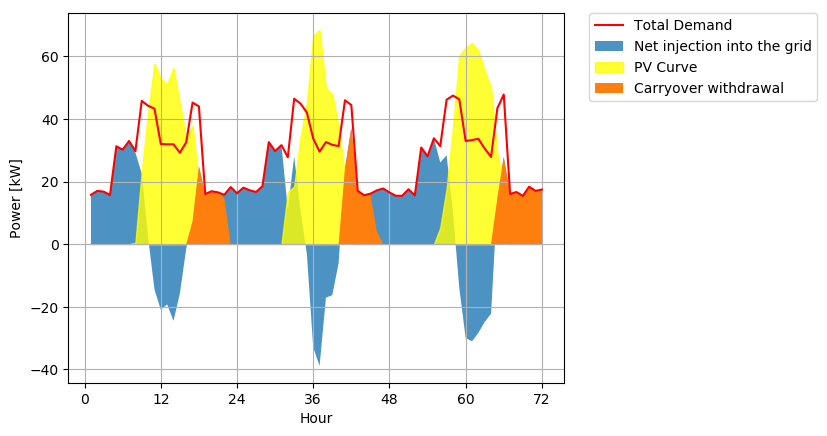

In [32]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [33]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7223.97 8105.84 5741.07  | 13683.22 3340.95 3340.95  | 7.92 2021.49 5358.25  | 50.79 50.71 33.8  | 50.57 33.82 33.8  | 13683.22 3340.95 6704.78 3363.83 0.0 
2 | 6608.06 7458.87 5291.92  | 10384.03 2085.46 2085.46  | 1769.22 1913.68 5291.92  | 51.67 51.67 34.44  | 51.54 34.1 34.44  | 24067.25 5426.41 11792.95 6366.54 0.0 
3 | 7205.62 8089.79 5748.09  | 10428.62 1563.22 1563.22  | 2342.57 2524.22 5748.09  | 50.8 50.41 33.88  | 50.75 33.69 33.88  | 34495.87 6989.63 16902.98 9913.35 0.0 
4 | 7505.85 8375.99 5924.03  | 11445.12 1558.48 1558.48  | 2273.57 2163.16 5924.03  | 54.31 53.93 36.0  | 54.14 36.1 36.0  | 45940.99 8548.11

In [34]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
431.03 55004.62 104968.13  | 70260.19  | 393128.42 220559.9 112467.56  | 482611.04 229610.39 145705.85  | 484670.38 344338.48 145705.85  | 806559.22 
96280.98 52071.29 103668.73  | 43857.27  | 359610.4 202955.93 103668.73  | 491828.33 231525.25 148446.13  | 493077.6 350812.0 148446.13  | 634666.21 
127482.6 68683.95 112605.05  | 32874.45  | 392129.82 220123.19 112605.05  | 484270.07 228773.8 146022.0  | 484752.23 342307.8 146022.0  | 633348.16 
123727.76 58859.53 116051.78  | 32774.8  | 408468.63 227910.77 116051.78  | 516628.75 245125.88 155187.64  | 518260.01 366211.15 155187.64  | 690201.95 
37768.2 455

## TMT Case 3: Large PV System

In [35]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

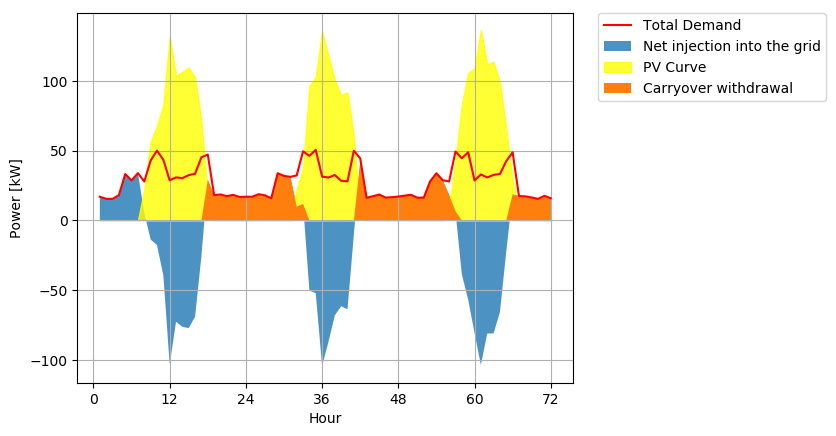

In [36]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [37]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7236.47 8097.1 5748.83  | 29908.58 18206.11 9379.92  | 0.0 29.58 0.0  | 50.79 50.39 33.4  | 49.45 33.82 33.4  | 29908.58 9379.92 14655.21 5275.29 5275.29 
2 | 6661.38 7474.88 5288.11  | 20825.03 11270.42 9869.77  | 0.0 0.0 0.0  | 51.63 51.37 34.28  | 51.63 34.39 34.28  | 50733.61 19249.69 24859.47 5609.78 5609.78 
3 | 7161.13 8175.46 5729.87  | 22336.05 11962.38 10692.79  | 0.0 0.0 0.0  | 50.85 50.62 33.85  | 50.77 33.49 33.85  | 73069.67 29942.47 35804.14 5861.66 5861.66 
4 | 7438.7 8391.9 5924.43  | 25263.0 13605.01 10097.05  | 0.0 0.0 0.0  | 54.36 54.26 35.57  | 54.25 36.24 35.57  | 98332.66 40039.52 48183.01 8143.48 81

In [38]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 804.87 0.0  | 197259.74  | 393808.68 220322.05 112619.58  | 471877.82 229667.75 143956.63  | 484686.45 342131.87 143956.63  | 981369.18 
0.0 0.0 0.0  | 207561.18  | 362512.19 203391.59 103594.11  | 492691.93 233509.16 147773.34  | 492691.93 348813.04 147773.34  | 895821.51 
0.0 0.0 0.0  | 224869.28  | 389708.68 222454.36 112248.08  | 484495.75 227372.18 145891.33  | 485240.51 343737.74 145891.33  | 960590.56 
0.0 0.0 0.0  | 212340.96  | 404814.1 228343.64 116059.62  | 517699.29 246059.51 153333.24  | 518700.9 368396.58 153333.24  | 1.00302099e6 
0.0 0.0 0.0  | 193978.83  | 390160.9 220493.56 111625.67  | 482